In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelBinarizer

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/COVIDSenti-A.csv')
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [29]:
df.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [30]:
df.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [31]:
df.tail()

,tweet,label
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu
29999,The Australian dollar has hit a fresh decade l...,neu


In [32]:
df.isna()

,tweet,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
29995,False,False
29996,False,False
29997,False,False
29998,False,False


In [33]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [34]:
df['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

In [35]:
stop_words = set(stopwords.words('english'))

In [36]:
def clean_tweet(tweet):
  if type(tweet) == float:
    return ""
  temp = tweet.lower() # Making all the words in lower case
  temp = re.sub("'","",temp) #To avoid removing contractions in English
  temp = re.sub("@[A-Za-z0-9_]+","", temp) #Removing mentions
  temp = re.sub("#[A-Za-z0-9_]+","", temp) #Removing hashtags
  temp = re.sub(r'http\S+', '', temp) #Removing links
  temp = re.sub('\[().*!?\]', ' ', temp) # Removing punctuations
  temp = re.sub("[^a-z0-9]", " ", temp)
  temp = temp.split() # Splitting the sentence into individual words
  temp = [w for w in temp if not w in stop_words]
  temp = " ".join(word for word in temp)
  return temp  

In [37]:
df['tweet'] = df['tweet'].apply(clean_tweet)
df

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,true corona virus swine flue bird flu december...,neu
2,tldr sars possibly new coronavirus difficult c...,neg
3,disease outbreak news middle east respiratory ...,neu
4,china media wsj says sources tell mystery pneu...,neu
...,...,...
29995,cdc test confirms westerdam cruise ship passen...,neu
29996,two doctors die coronavirus within 24 hours ch...,neu
29997,beijing lockdown guo jings neighbourhood wuhan...,neu
29998,route spread,neu


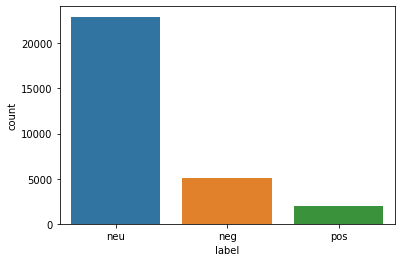

In [38]:
sns.countplot(x="label", data=df)
plt.show()

In [39]:
# DEPENDENT AND INDEPENDENT VARIABLES
X = df['tweet']
y = df['label']

In [40]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [41]:
X_train.shape

(21000,)

In [42]:
X_test.shape

(9000,)

In [43]:
df_train = pd.DataFrame()
df_train['tweet'] = X_train
df_train['label'] = y_train
df_train

,tweet,label
15925,joining fight coronavirus v,neu
10062,world snooker tour chiefs forced postpone 1mil...,neg
19376,first ever china product lasting long time,neu
6384,japanese media spread information also spread ...,neg
15976,tesla warns coronavirus hit china deliveries,neu
...,...,...
13123,watched contagion three times im pretty sure c...,neu
19648,believe everything read social media serious i...,neg
9845,well defeat coronavirus,neu
10799,south florida students told stay home possible...,neu


In [44]:
df_test = pd.DataFrame()
df_test['tweet'] = X_test
df_test['label'] = y_test
df_test

,tweet,label
8225,duterte like welcome chinese especially corona...,neu
10794,information stating infected novel coronavirus...,neu
9163,coronavirus update pandemic via,neu
26591,3000 healthcare personnel china infected coron...,pos
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker telling come train...,neu
17453,,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,sounds like something catch drinking beers spr...,neu


In [45]:
df_test['label'].value_counts()

neu    6828
neg    1591
pos     581
Name: label, dtype: int64

In [46]:
tf_idf_vect = TfidfVectorizer(max_features = 5000)
tf_idf_vect.fit(df['tweet'])
X_train_tfidf = tf_idf_vect.transform(df_train['tweet'])
X_test_tfidf = tf_idf_vect.transform(df_test['tweet'])

In [47]:
print(X_train_tfidf)

  (0, 1848)	0.9741962073988126
  (0, 1119)	0.22570279016833045
  (1, 4916)	0.2186722663748053
  (1, 4528)	0.3587960132292838
  (1, 3415)	0.3853155646128059
  (1, 3159)	0.3403397239020769
  (1, 1924)	0.3747410472339973
  (1, 1119)	0.06499532581140907
  (1, 920)	0.13777969057256426
  (1, 914)	0.43737754297011566
  (1, 893)	0.3815224323517312
  (1, 361)	0.24218108789675988
  (2, 4496)	0.3564163172958567
  (2, 3500)	0.5684473733279514
  (2, 2729)	0.4272672237639855
  (2, 1880)	0.2906852591615487
  (2, 1693)	0.49583861483020264
  (2, 920)	0.19215582262392528
  (3, 4758)	0.1748556286943295
  (3, 4294)	0.42968255378843717
  (3, 4184)	0.5221868441706797
  (3, 2855)	0.33299637493476975
  (3, 2505)	0.3876347738394451
  (3, 2412)	0.36455233801702724
  (3, 347)	0.34361839458312987
  :	:
  (20996, 2855)	0.3015921907063131
  (20996, 2676)	0.2423804765418387
  (20996, 2527)	0.35845596630633914
  (20996, 2402)	0.2992335484871525
  (20996, 1699)	0.35463499597787185
  (20996, 1116)	0.16816011158084074
 

In [48]:
print(X_test_tfidf)

  (0, 4839)	0.3889217394281965
  (0, 4758)	0.14837810616044908
  (0, 2676)	0.22709483424488142
  (0, 1957)	0.32735315014844696
  (0, 1828)	0.3278754030398021
  (0, 1659)	0.39278843630304333
  (0, 1533)	0.4304762750086706
  (0, 1427)	0.2687264774585638
  (0, 1147)	0.29335198305920435
  (0, 1116)	0.1575551513508964
  (0, 924)	0.19443219700723482
  (1, 4579)	0.40502423556597
  (1, 4221)	0.4597491543670328
  (1, 3269)	0.28124415769816213
  (1, 3100)	0.23004252043850915
  (1, 3032)	0.2933200418771532
  (1, 2412)	0.3189865795969665
  (1, 2400)	0.24460016945999166
  (1, 1119)	0.06831979958707389
  (1, 1044)	0.4071442477552536
  (1, 65)	0.27297597859243367
  (2, 4740)	0.439443057669768
  (2, 4687)	0.610320145050413
  (2, 3231)	0.6397795662090519
  (2, 1119)	0.15837053473687934
  :	:
  (8997, 4702)	0.4433491134277747
  (8997, 4410)	0.47059164626080796
  (8997, 2530)	0.44074711464878685
  (8997, 1492)	0.3743008007903325
  (8997, 1119)	0.07314433897314977
  (8997, 569)	0.49221526106472413
  (8998

In [49]:
print(tf_idf_vect.vocabulary_)

{'coronavirus': 1119, 'human': 2286, 'types': 4634, 'cdc': 854, 'true': 4598, 'corona': 1116, 'virus': 4758, 'swine': 4365, 'bird': 626, 'flu': 1902, 'december': 1284, 'whole': 4859, 'busy': 766, 'sars': 3871, 'possibly': 3411, 'new': 3053, 'difficult': 1400, 'confirm': 1052, 'patients': 3270, 'identified': 2310, 'later': 2620, 'infection': 2402, 'disease': 1427, 'outbreak': 3191, 'news': 3059, 'middle': 2898, 'east': 1548, 'respiratory': 3757, 'syndrome': 4375, 'mers': 2878, 'cov': 1157, 'united': 4669, 'arab': 426, 'china': 920, 'media': 2855, 'wsj': 4942, 'says': 3880, 'sources': 4138, 'tell': 4416, 'mystery': 3007, 'pneumonia': 3377, 'something': 4122, 'causing': 846, 'family': 1791, 'weigh': 4835, 'novel': 3100, 'chinas': 921, 'chinese': 924, 'authorities': 500, 'made': 2768, 'preliminary': 3451, 'keep': 2549, 'saying': 3879, 'unknown': 4674, 'cause': 843, 'obviously': 3122, 'related': 3695, 'lets': 2661, 'report': 3729, 'mysterious': 3006, 'illnesses': 2328, 'may': 2840, 'identif

In [50]:
#Building and fitting the model
svm = SVC(probability = True, kernel = 'linear')
svm.fit(X_train_tfidf, y_train )

SVC(kernel='linear', probability=True)

In [51]:
#making predictions
predictions = svm.predict(X_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = X_test
test_prediction['label'] = predictions
test_prediction   

,tweet,label
8225,duterte like welcome chinese especially corona...,neu
10794,information stating infected novel coronavirus...,neu
9163,coronavirus update pandemic via,neu
26591,3000 healthcare personnel china infected coron...,neu
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker telling come train...,neu
17453,,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,sounds like something catch drinking beers spr...,neu


In [52]:
test_prediction['label'].value_counts()

neu    7384
neg    1307
pos     309
Name: label, dtype: int64

In [53]:
test_prediction.tail(50)

,tweet,label
6541,fkn coronavirus getting close 2 home amp im ok,neu
6010,would like think cannot possibly excel much,neu
15307,coronavirus live updates cases expected uk dea...,neu
9154,wow corona virus making sars swine flu look mi...,neu
24994,lets hope none infected,neu
12105,help fight outbreak pneumonia caused novel cor...,neu
2550,getting coronavirus saying five clock somewhere,neu
22956,,neu
11358,communities china threaten kill pets due coron...,neu
16755,coronavirus whistleblower li wenliang died wuh...,neu


In [54]:
test_prediction.head(50)

,tweet,label
8225,duterte like welcome chinese especially corona...,neu
10794,information stating infected novel coronavirus...,neu
9163,coronavirus update pandemic via,neu
26591,3000 healthcare personnel china infected coron...,neu
6631,brent recoups china virus angst fed speak play...,neu
14161,soccer players ditching china bc coronavirus s...,neg
252,coronavirus thing looks like scene,neu
2566,let hope passenger ok amid fears coronavirus o...,neu
3478,coronavirus stuff inner hypochondriac going nuts,neu
2917,new york times coronavirus spurs china suspend...,neu


In [55]:
print(test_prediction)

                                                   tweet label
8225   duterte like welcome chinese especially corona...   neu
10794  information stating infected novel coronavirus...   neu
9163                     coronavirus update pandemic via   neu
26591  3000 healthcare personnel china infected coron...   neu
6631   brent recoups china virus angst fed speak play...   neu
...                                                  ...   ...
21914  united panic bought striker telling come train...   neu
17453                                                      neu
20344  nzd usd technical bias bearish dow jones brush...   neu
1878   sounds like something catch drinking beers spr...   neu
6465   update beijing reported 11 new cases pneumonia...   neu

[9000 rows x 2 columns]


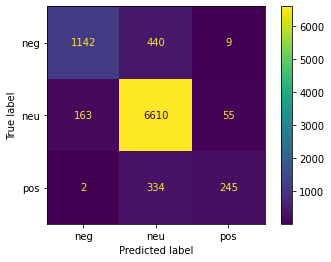

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [57]:
review = """Quarantine is so boring"""
review_vector = tf_idf_vect.transform([review]) # vectorizing
print(svm.predict(review_vector))

['neu']


In [58]:
review = """COVID-19 has made a terrible future"""
review_vector =tf_idf_vect.transform([review]) # vectorizing
print(svm.predict(review_vector))

['neg']


In [59]:
review = """Many people spent their time effectively during lockdown"""
review_vector = tf_idf_vect.transform([review]) # vectorizing
print(svm.predict(review_vector))

['pos']


In [60]:
accuracy = accuracy_score(predictions, y_test)*100
accuracy    

88.85555555555555

In [61]:
print("CLASSIFICATION_REPORT:")
print(classification_report(y_test, predictions))

CLASSIFICATION_REPORT:
              precision    recall  f1-score   support

         neg       0.87      0.72      0.79      1591
         neu       0.90      0.97      0.93      6828
         pos       0.79      0.42      0.55       581

    accuracy                           0.89      9000
   macro avg       0.85      0.70      0.76      9000
weighted avg       0.88      0.89      0.88      9000

